<a href="https://colab.research.google.com/github/hachteja/Demo_Notebook_MM2021/blob/main/Demo_Notebook_MM2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ipython Notebook for Analysis of Plasmonic Low Loss Dataset
8.9.21

Notebook created by Jordan A.  Hachtel in association with the x42 Physical Sciences Tutoral on monochromated EELS from the Virtual M&M 2021 Meeting

In [1]:
#@title Import Numpy and Matplotlib (also display figures inline)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#@title Download Data Files from Google Drive

# Honeycomb Plasmonic Cluster HAADF and SI (Data and Metadata)
!gdown https://drive.google.com/uc?id=1dVL7QK1dzmoODp-Z0f-OVa_5TGyCp30K
!gdown https://drive.google.com/uc?id=1X3a3hPz34ud9sTBMdNZRPBTFoo0zFZl7
!gdown https://drive.google.com/uc?id=1JQOS6BtP5STOc9rolD2ef0Q45DfsaUfy
!gdown https://drive.google.com/uc?id=12_vqF4cOVWyNO3OZYJT9fOX5MjsQIpGd


Downloading...
From: https://drive.google.com/uc?id=1dVL7QK1dzmoODp-Z0f-OVa_5TGyCp30K
To: /content/SI_Dataset.npy
29.5MB [00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X3a3hPz34ud9sTBMdNZRPBTFoo0zFZl7
To: /content/SI_Dataset_HAADF.npy
100% 14.5k/14.5k [00:00<00:00, 25.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JQOS6BtP5STOc9rolD2ef0Q45DfsaUfy
To: /content/SI_Dataset.json
100% 831/831 [00:00<00:00, 1.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=12_vqF4cOVWyNO3OZYJT9fOX5MjsQIpGd
To: /content/SI_Dataset_HAADF.json
100% 6.64k/6.64k [00:00<00:00, 5.98MB/s]


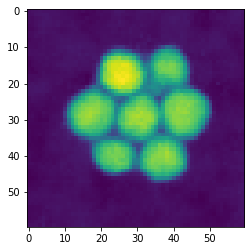

In [3]:
#@title Load and Display HAADF Data

#Load SI HAADF
filename='/content/SI_Dataset_HAADF.npy'
haadf_dat=np.load(filename)

#Display SI HAADF
plt.imshow(haadf_dat)

In [4]:
#@title Load HAADF Calibrations

import json
filename='/content/SI_Dataset_HAADF.json'
haadf_mdat=json.load(open(filename,'r'))
cal=haadf_mdat['spatial_calibrations'][0]['scale']
print('Calibration: ',cal)

Calibration:  1.0833333333333333


In [5]:
#@title Load SI Data and Metadata

#Load SI Data
filename='/content/SI_Dataset.npy'
si_dat=np.load(filename)

#Load SI Metadata
filename='/content/SI_Dataset.json'
si_mdat=json.load(open(filename,'r'))
disp=si_mdat['spatial_calibrations'][2]['scale']
offset=si_mdat['spatial_calibrations'][2]['offset']

print('Dispersion: ',disp,'Offset: ',offset)

#Use SI Metadata to Create Numpy Array with Energy Loss Axis
energy_loss_eV=np.arange(si_dat.shape[2])*disp+offset

#Please note this notebook requires you to preprocess your data 
#to provide the calibrated dispersion and offset

Dispersion:  0.0012296000000000013 Offset:  -0.2421264993748538


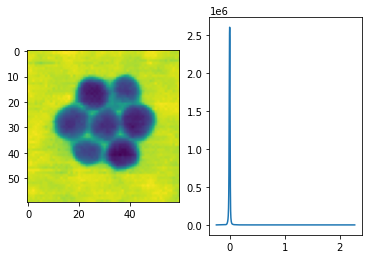

In [6]:
#@title Display SI Data

#Step by step instructions

#Step 0: Generate Energy Filtered Slice and Representative Spectrum from Whole Dataset
si_av_im=np.average(si_dat,axis=2)
si_av_spec=np.average(si_dat,axis=(0,1))

#Step 1: Create Figure
fig=plt.figure()

#Step 2: Create Energy Filtered Slice and Representative Spectrum Axes
ax_im=fig.add_subplot(121)
ax_spec=fig.add_subplot(122)

#Step 3: Display Slice and Spectrum
ax_im.imshow(si_av_im)
ax_spec.plot(energy_loss_eV,si_av_spec)

Text(0, 0.5, 'EELS (counts)')

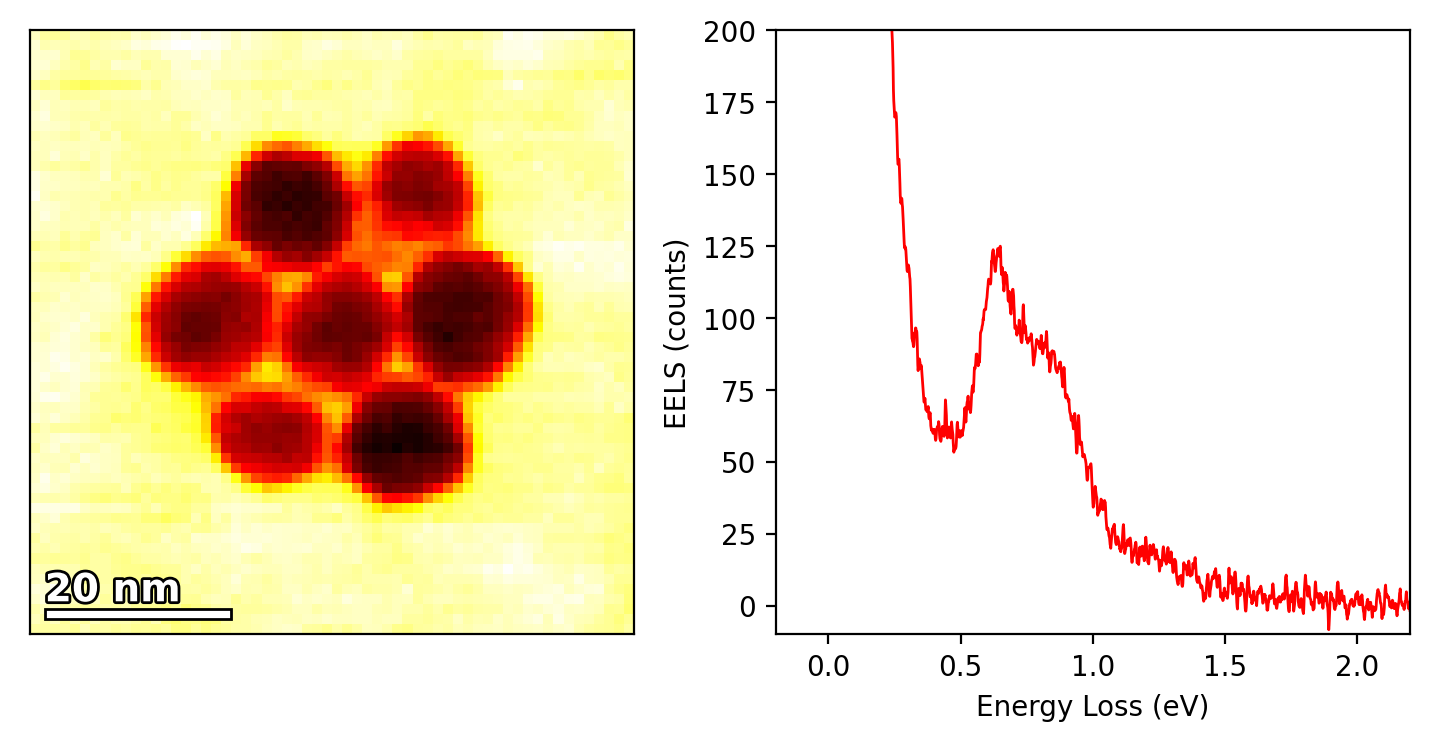

In [7]:
#@title Display SI Data with Improved Formatting

#Step by step instructions

#Step 1: Create Figure, choose resolution (dpi) and figure dimensions (figsize)
fig=plt.figure(dpi=200,figsize=(9,4))

#Step 2: Create Slice/Spectra Axes, remove ticks from slice image
ax_im=fig.add_subplot(121,xticks=[],yticks=[])
ax_spec=fig.add_subplot(122)

#Step 3: Display Slice and Spectrum (add colormaps and plot colors)
from pylab import cm #Libary with wide variety of color maps
ax_im.imshow(si_av_im,cmap=cm.hot) 
ax_spec.plot(energy_loss_eV,si_av_spec,color='r',lw=1)

#Step 4a: Add Scale Bar to Slice Image
import matplotlib.patches as mpatch #library for shape annotations (called patches)
ax_im.add_patch(mpatch.Rectangle((1,57),20/cal,1,fc='w',ec='k')) #Scale Bar
txt=ax_im.text(1,57,'20 nm',fontsize=14,fontweight='bold'
      ,color='w',ha='left',va='bottom') #Scale Bar Text

#Step 4b: Add Stroke to Scale Bar Text
from matplotlib import patheffects as pe 
txt.set_path_effects([pe.withStroke(linewidth=2,foreground='k')])

#Step 5: Adjust Spectrum x and y limits to see plasmons
ax_spec.set_xlim(-0.2,2.2)
ax_spec.set_ylim(-1e1,2e2) #Comment out this line, and uncomment below if you want log scale
# ax_spec.set_yscale('log') #Comment out this line, and uncomment above if you want linear scale

#Step 6: Add Labels to Spectrum Plot
ax_spec.set_xlabel('Energy Loss (eV)')
ax_spec.set_ylabel('EELS (counts)')

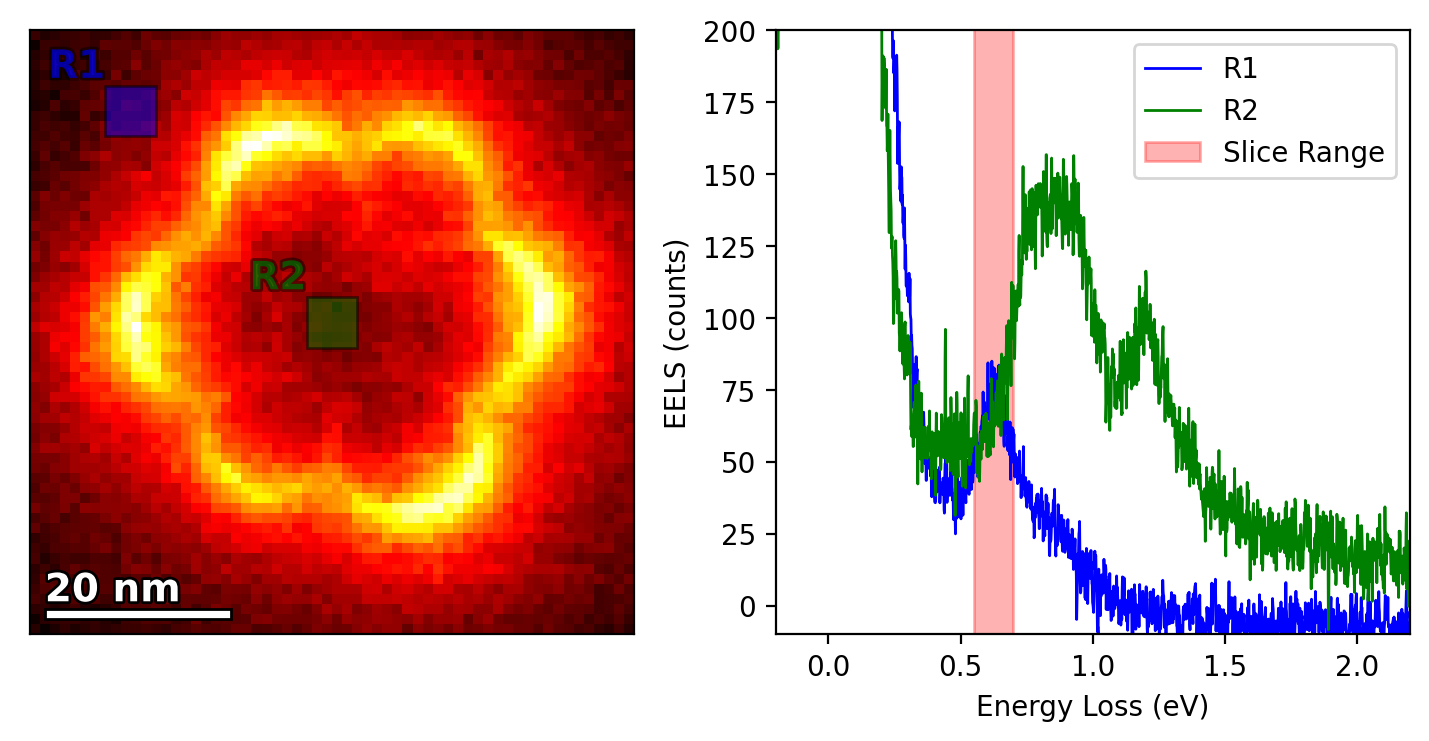

In [8]:
#@title Display SI Data with Improved Formatting and Selectable Spectra/Slice

#Set Pixels for Representative Spectra
R1=7,5
R2=27,26
W,H=5,5

#Set Energy Range for SI SLice
Slice_Ran=[0.55,0.7]

#Convert Energies to Channel Inde
Slice_Ran_i=[np.argmin(np.abs(energy_loss_eV-En)) for En in Slice_Ran] 
# This is called a list comprehension it runs through all the energies in 
# Slice_Ran and executes the command in the brackets for each energy

#Generate Slice and Spectra from Selected Ranges/Regions
SI_Slice=np.average(si_dat[:,:,Slice_Ran_i[0]:Slice_Ran_i[1]],axis=2)
R_specs=[np.average(si_dat[R[1]:R[1]+H,R[0]:R[0]+W],axis=(0,1)) for R in [R1,R2]]
# Note: Numpy arrays have the row as the first element, and column as the second.
# This means the y-value goes first when selecting a region in a 2D image

#Create Figure
fig=plt.figure(dpi=200,figsize=(9,4))

#Create Slice/Spectra Axes
ax_im=fig.add_subplot(121,xticks=[],yticks=[])
ax_spec=fig.add_subplot(122)

#Display Slice and Spectra
from pylab import cm #Libary with wide variety of color maps
ax_im.imshow(SI_Slice,cmap=cm.hot) 
ax_spec.plot(energy_loss_eV,R_specs[0],color='b',lw=1,label='R1')
ax_spec.plot(energy_loss_eV,R_specs[1],color='g',lw=1,label='R2')
# Note: We have added a label argument here, this is for the legend later

#Add Scale Bar
ax_im.add_patch(mpatch.Rectangle((1,57),20/cal,1,fc='w',ec='k')) #Scale Bar
stroke=[pe.withStroke(linewidth=2,foreground='k')]
ax_im.text(1,57,'20 nm',fontsize=14,fontweight='bold',color='w'
  ,ha='left',va='bottom',path_effects=stroke)
# Note: Can add stroke by defining the path effects as a variable and calling it
# Helpful when you use it multiple times in a notebook

#Adjust Spectrum x and y limits
ax_spec.set_xlim(-0.2,2.2)
ax_spec.set_ylim(-1e1,2e2)

#Add Labels to Spectrum Plot
ax_spec.set_xlabel('Energy Loss (eV)')
ax_spec.set_ylabel('EELS (counts)')

#Display Spectra Regions on Slice
ax_im.add_patch(mpatch.Rectangle(R1,W,H,fc='b',ec='k',alpha=0.5))
ax_im.add_patch(mpatch.Rectangle(R2,W,H,fc='g',ec='k',alpha=0.5))
ax_im.text(*R1,'R1',fontsize=14,fontweight='bold',color='b',ha='right',va='bottom',alpha=0.5,path_effects=stroke)
ax_im.text(*R2,'R2',fontsize=14,fontweight='bold',color='g',ha='right',va='bottom',alpha=0.5,path_effects=stroke)

#Display Slice Regions on Spectra
ax_spec.fill_betweenx([-1e1,3e2],Slice_Ran[0],Slice_Ran[1],color='r',alpha=0.3,label='Slice Range')

#Add Legend on Spectra Axis
ax_spec.legend()


In [9]:
#@title Writing Your Own Functions for Advanced Analyses

def FitPowerlaw(E,S,fen_lo,fen_hi,visualize=True):
# General format for functions is:
# def FunctionName(args):
#   the function
#   return output 
    """
    Fits a power law background to an EEL spectrum over an energy ranges
    
    Input:    E        - energy axis of EEL spectrum (numpy array)
              S        - EELS axis of EEL spectrum (numpy array)
              fen_lo   - lower energy limit (float)
              fen_hi   - upper energy limit (float)
    Optional: viualize - Plot output (boolean): Default - True
    Output:   E_out    - energy axis of the fitted region (numpy array)
              BG_out   - background intensity in fitted region (numpy array)
              S_out    - EELS intensity in fitted region (numpy array)    
    """   
# Adding the 3 " allows you to put in a comment that can be accessed by typing
# the command with a ? (as in FitPowerlaw?) Not necessary but helpful in the long run

    i_lo=np.argmin(np.abs(E-fen_lo))
    i_hi=np.argmin(np.abs(E-fen_hi))
    elog=np.log(E[i_lo:i_hi][np.where(S[i_lo:i_hi]>0)])
    slog=np.log(S[i_lo:i_hi][np.where(S[i_lo:i_hi]>0)])
    r,A0=np.polyfit(elog,slog,1)
    E_out=E[i_lo:]
    BG_out=np.exp(A0)*E[i_lo:]**(r)
    S_out=S[i_lo:]-BG_out
    if visualize:
        f,a=plt.subplots(3,1,figsize=(4,10),dpi=100)
        a[0].plot(E,S/np.amax(S),color='k',label='Data')
        a[0].plot(E[i_lo:i_hi],(S/np.amax(S))[i_lo:i_hi],marker='o',ms=7,markerfacecolor='none',markeredgecolor='r',lw=0,alpha=0.5,markevery=5,label='Fit Region')
        a[0].legend(frameon=False,fontsize=10)
        a[0].set_yscale('log')
        a[0].set_xlabel('Energy Loss (eV)')
        a[0].set_ylabel('Normalized Intensity (au)')
        a[1].plot(E,S/np.amax(S),color='k',label='Data')
        BG_norm=(BG_out-np.amin(S))/np.ptp(S)
        a[1].plot(E_out,BG_norm,color='b',lw=3,label='Power Law Fit')
        a[1].legend(frameon=False,fontsize=10)
        a[1].set_yscale('log')   
        a[1].set_xlabel('Energy Loss (eV)')
        a[1].set_ylabel('Normalized Intensity (au)')
        a[2].plot(E_out,S_out,color='b',label='Bkg. Subtracted Data')
        a[2].axhline(0,color='k',lw=0.5,ls='--')
        a[2].set_xlabel('Energy Loss (eV)')
        a[2].set_ylabel('Intensity (counts)')      
    return E_out,BG_out,S_out

# This may look complicated by the majority of this is just visualization to
# help see what the function is doing, actual function is only first 8 lines

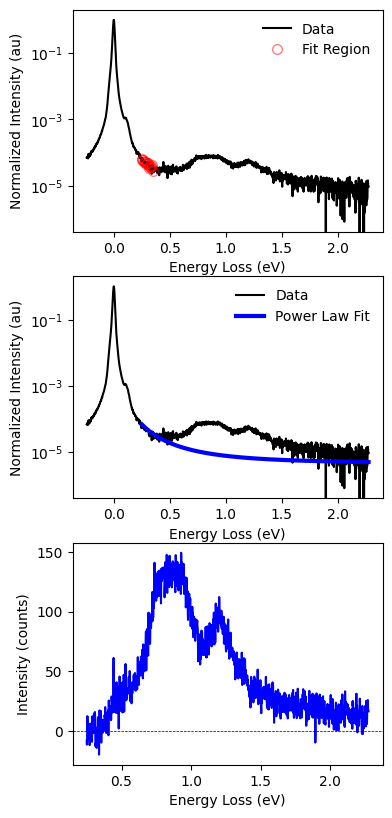

In [10]:
#@title Using Your Own Functions

energy_loss_f,BG_R_Spec1_f,R_Spec_f=FitPowerlaw(energy_loss_eV,R_specs[1],0.25,0.35)
# Note: I do this step to determine which parameters I want to apply to the entire
# dataset (similar to how it works on DM3 or Swift)

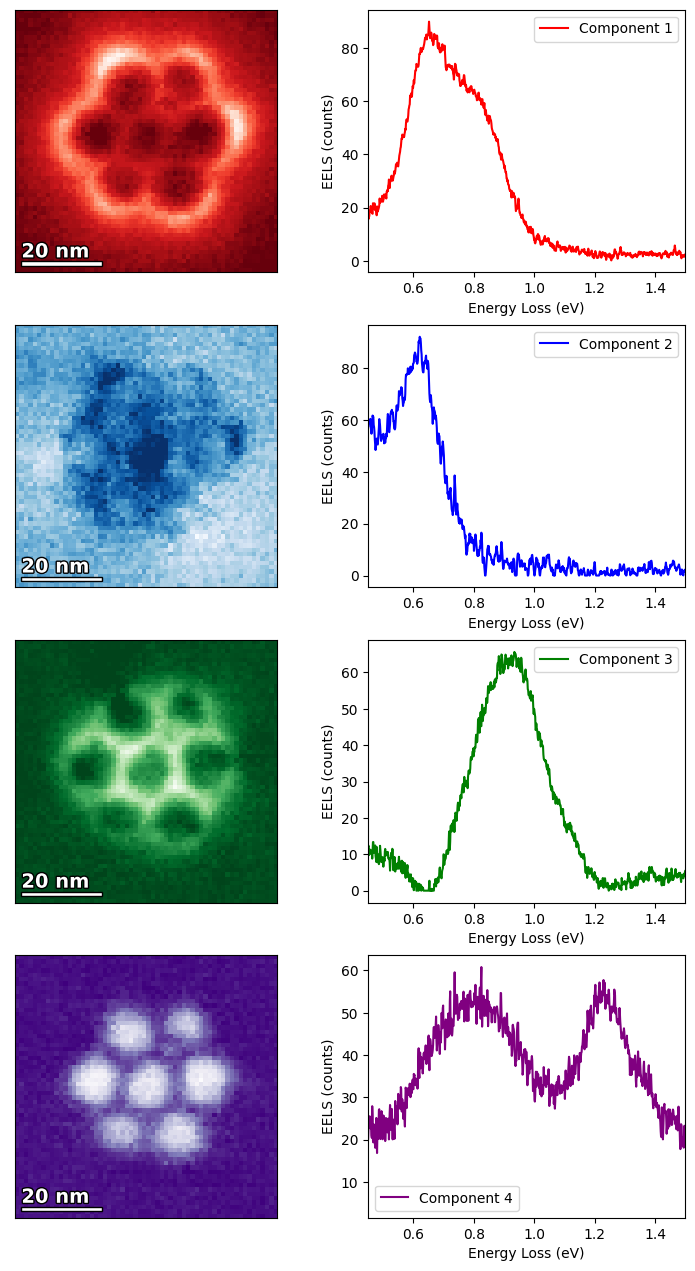

In [11]:
#@title Using Established Python Libraries for Advanced Analyses

#Import Desired package
from sklearn.decomposition import NMF

#Remove ZLP from Entire SI
E_Cutoff=0.45
i_Cutoff=np.argmin(np.abs(energy_loss_eV-E_Cutoff))
energy_loss_nmf=energy_loss_eV[i_Cutoff:]
si_nmf=np.copy(si_dat[:,:,i_Cutoff:])

#Remove All Negative Datapoints
si_nmf[np.where(si_nmf<0)]=0

#Reshape in 2D Array
si_nmf=si_nmf.reshape((np.prod(si_nmf.shape[:2]),si_nmf.shape[2]))

#Define Number of NMF Components
N=4
model=NMF(n_components=N,max_iter=10000,init='nndsvda')
NMF_Maps=model.fit_transform(si_nmf)
NMF_Maps=NMF_Maps.reshape(si_dat.shape[:2]+(N,)).transpose(2,0,1)
NMF_Specs=model.components_

#Display NMF Decomposition
colormaps=[cm.Reds_r,cm.Blues_r,cm.Greens_r,cm.Purples_r]
colors=['r','b','g','Purple']
fig=plt.figure(figsize=(9,4*N),dpi=100)
for i in range(N):
    #Display NMF Abundance Map
    ax_im=fig.add_subplot(N,2,2*i+1,xticks=[],yticks=[])
    ax_im.imshow(NMF_Maps[i],cmap=colormaps[i],vmin=0)
    ax_im.add_patch(mpatch.Rectangle((1,57),20/cal,1,fc='w',ec='k'))
    ax_im.text(1,57,'20 nm',fontsize=14,fontweight='bold',color='w',ha='left',va='bottom',path_effects=stroke)
    
    #Display NMF Spectral Endmember
    ax_spec=fig.add_subplot(N,2,2*i+2)
    ax_spec.plot(energy_loss_nmf,NMF_Specs[i],color=colors[i],label='Component '+str(int(i+1)))
    ax_spec.set_xlabel('Energy Loss (eV)')
    ax_spec.set_ylabel('EELS (counts)')
    ax_spec.set_xlim(E_Cutoff,1.5)
    ax_spec.legend()